In [1]:
import random
# Global variable to count key comparisons
comparison_count = 0

# Insertion Sort with comparison count
def insertion_sort(arr):
    global comparison_count
    n = len(arr)
    for i in range(1, n):
        j = i
        while j > 0 and arr[j] < arr[j - 1]:
            comparison_count += 1  # Increment comparison count
            # Swap elements
            arr[j], arr[j - 1] = arr[j - 1], arr[j]
            j -= 1
        comparison_count += 1  # Last comparison where arr[j] >= arr[j - 1]
    return arr


# Hybrid Sort with comparison count
def hybrid_sort(arr, S):
    global comparison_count
    if len(arr) <= S:
        insertion_sort(arr)
    else:
        if len(arr) > 1:
            mid = len(arr) // 2
            left_half = arr[:mid]
            right_half = arr[mid:]

            hybrid_sort(left_half, S)
            hybrid_sort(right_half, S)

            i = j = k = 0
            while i < len(left_half) and j < len(right_half):
                comparison_count += 1  # Increment comparison count
                if left_half[i] < right_half[j]:
                    arr[k] = left_half[i]
                    i += 1
                else:
                    arr[k] = right_half[j]
                    j += 1
                k += 1

            while i < len(left_half):
                arr[k] = left_half[i]
                i += 1
                k += 1

            while j < len(right_half):
                arr[k] = right_half[j]
                j += 1
                k += 1
            return arr


Minimum time = 0.2262 seconds at S = 20


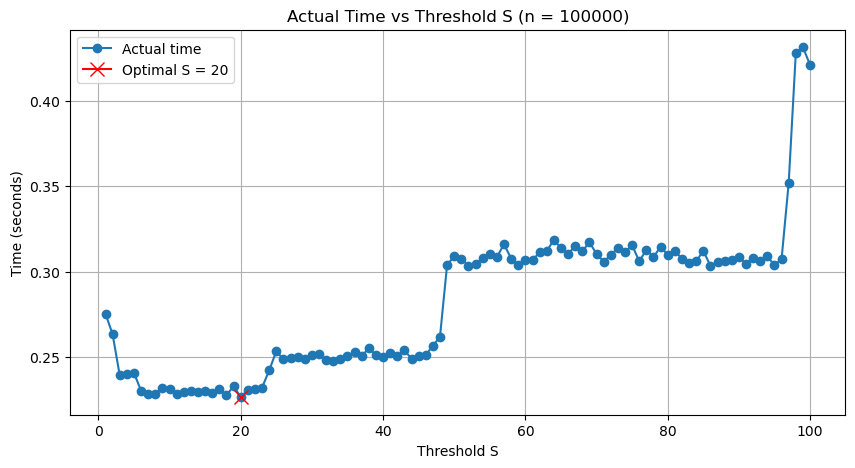

In [3]:
import pandas as pd
import time
import matplotlib.pyplot as plt
global comparison_count
import numpy as np

# Function to load dataset from CSV file
def load_dataset(size):
    df = pd.read_csv(f'dataset_{size}.csv')  # Load the CSV file
    return df['Value'].tolist()  # Convert the column to a list

# Set fixed input size and range of S values
n = 100000  # Example fixed input size
S_values = range(1, 101)  # Test S values from 1 to 100

# Function to analyze time complexity for varying S and find the optimal S
def analyze_time_complexity_for_S(n, S_values):
    dataset = load_dataset(n)
    time_results = []

    # Run hybrid sort for each S and record the time taken
    for S in S_values:
        start_time = time.time()
        hybrid_sort(dataset.copy(), S)
        end_time = time.time()
        time_taken = end_time - start_time
        time_results.append(time_taken)

    # Find the minimum time and the corresponding S
    min_time = min(time_results)
    optimal_S = S_values[time_results.index(min_time)]

    print(f"Minimum time = {min_time:.4f} seconds at S = {optimal_S}")

    # Plot time complexity as a function of S
    plt.figure(figsize=(10, 5))
    plt.plot(S_values, time_results, marker='o', label="Actual time")
    
    # Highlight the optimal S on the plot
    plt.plot(optimal_S, min_time, marker='x', markersize=10, color="red", label=f"Optimal S = {optimal_S}")
    
    plt.title(f'Actual Time vs Threshold S (n = {n})')
    plt.xlabel('Threshold S')
    plt.ylabel('Time (seconds)')
    plt.grid(True)
    plt.legend()
    plt.show()

# Optional: Analyze time complexity for different S values and find the optimal S
analyze_time_complexity_for_S(n, S_values)
